In [ ]:
import zipfile
import os

# Path to your uploaded zip file
zip_file_path = "/content/sales+transactions+dataset+weekly.zip"  # Change this to the actual path of your uploaded file
extract_folder = "/content/sales_transactions_dataset"  # Folder where the contents will be extracted

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Check the files inside the extracted folder
os.listdir(extract_folder)


['Sales_Transactions_Dataset_Weekly.csv']

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/sales_transactions_dataset/Sales_Transactions_Dataset_Weekly.csv"  # Path to the CSV file
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
data.head()


,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


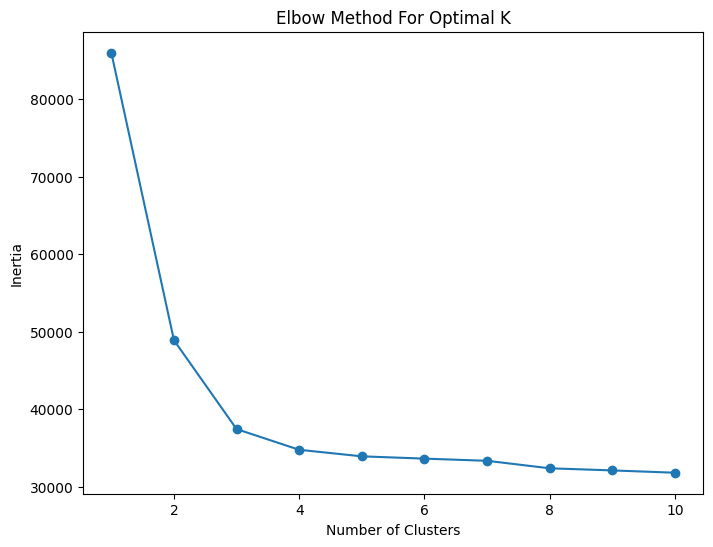

Silhouette Score for K-means (k=3): 0.27
DBSCAN did not produce more than one cluster. Silhouette Score is not applicable.
Best eps for DBSCAN: 0.50
Silhouette Score for DBSCAN could not be calculated due to lack of clusters.
Number of noise points in DBSCAN: 811


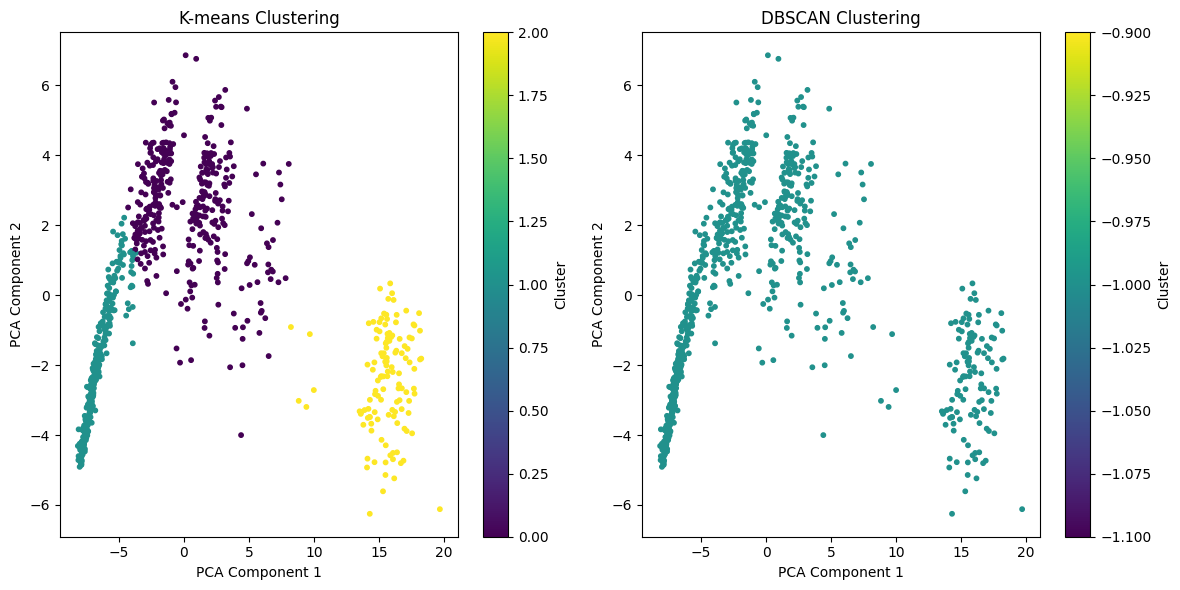

Number of clusters in K-means: 3
Number of clusters in DBSCAN (excluding noise): 0


In [ ]:
import zipfile
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Unzip the file and load the dataset
zip_file_path = "/content/sales+transactions+dataset+weekly.zip"  # Path to the ZIP file
extract_folder = "/content/sales_transactions_dataset"  # Folder where the contents will be extracted

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load the dataset
file_path = "/content/sales_transactions_dataset/Sales_Transactions_Dataset_Weekly.csv"
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Drop the 'Product_Code' column since it's non-numeric
data_clean = data.drop(columns=['Product_Code'])

# Check and handle missing values
data_clean = data_clean.fillna(data_clean.mean())

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Step 3: K-means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters
optimal_k = 3  # Adjust based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Calculate Silhouette Score for K-means
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
print(f"Silhouette Score for K-means (k={optimal_k}): {silhouette_kmeans:.2f}")

# Add K-means cluster labels to the data
data['KMeans_Cluster'] = kmeans_labels

# Step 4: DBSCAN Clustering
# Hyperparameter tuning for DBSCAN
eps_values = np.arange(0.3, 1.0, 0.1)  # Test different eps values
best_eps = 0.5
best_silhouette = -1

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(data_scaled)

    # Check for at least 2 clusters and calculate Silhouette Score
    if len(set(dbscan_labels)) > 1:
        silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)
        if silhouette_dbscan > best_silhouette:
            best_silhouette = silhouette_dbscan
            best_eps = eps

# Apply DBSCAN with the best eps value
dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Check for valid number of clusters before calculating silhouette score
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.2f}")
else:
    silhouette_dbscan = None
    print("DBSCAN did not produce more than one cluster. Silhouette Score is not applicable.")

# Print the best eps and handle the silhouette score accordingly
print(f"Best eps for DBSCAN: {best_eps:.2f}")
if silhouette_dbscan is not None:
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.2f}")
else:
    print("Silhouette Score for DBSCAN could not be calculated due to lack of clusters.")


# Count the noise points
noise_points = sum(dbscan_labels == -1)
print(f"Number of noise points in DBSCAN: {noise_points}")

# Add DBSCAN cluster labels to the data
data['DBSCAN_Cluster'] = dbscan_labels

# Step 5: Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Combined Visualization
plt.figure(figsize=(12, 6))

# K-means
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

# Step 6: Final Comparison
print(f"Number of clusters in K-means: {len(set(kmeans_labels))}")
print(f"Number of clusters in DBSCAN (excluding noise): {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")


Missing values per column:
W0               0
W1               0
W2               0
W3               0
W4               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 106, dtype: int64


Silhouette Score for K-means (k=3): 0.27
DBSCAN did not produce more than one cluster. Silhouette Score is not applicable.
Cluster Summary Table:
   Cluster  Count        W0        W1        W2        W3        W4        W5  \
0        0    371 -0.083337 -0.101109 -0.112794 -0.121835 -0.099510 -0.088952   
1        1    315 -0.713990 -0.702265 -0.693687 -0.690952 -0.702223 -0.709921   
2        2    125  2.046599  2.069801  2.082864  2.102806  2.064948  2.053010   

         W6        W7  ...  Normalized 42  Normalized 43  Normalized 44  \
0 -0.109351 -0.097617  ...       0.240781       0.275680       0.214748   
1 -0.700131 -0.709234  ...      -0.471405      -0.523896      -0.422782   
2  2.088882  2.076997  ...       0.473304       0.502001       0.428039   

   Normalized 45  Normalized 46  Normalized 47  Normalized 48  Normalized 49  \
0       0.230984       0.151260       0.285392       0.208048       0.317697   
1      -0.458939      -0.346154      -0.508796      -0.344024      -

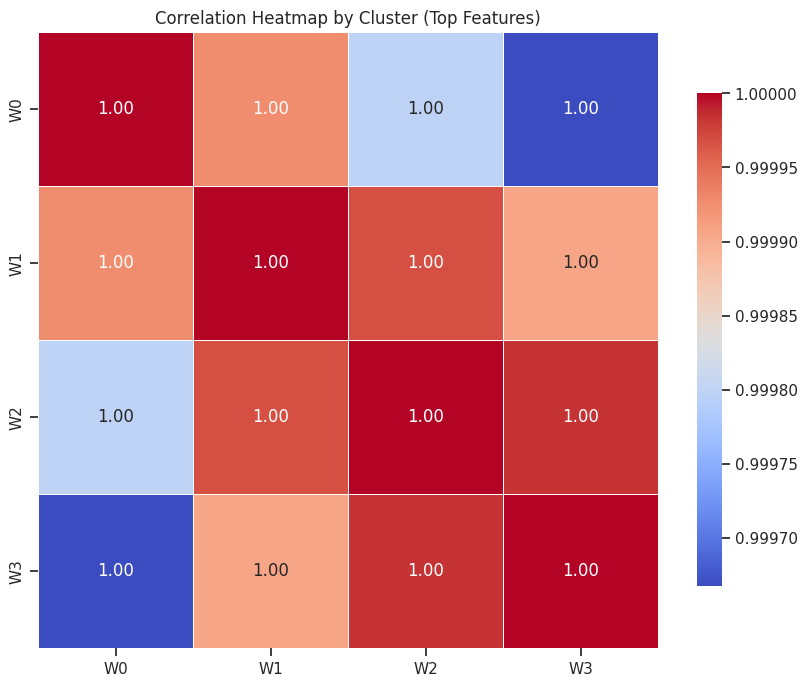

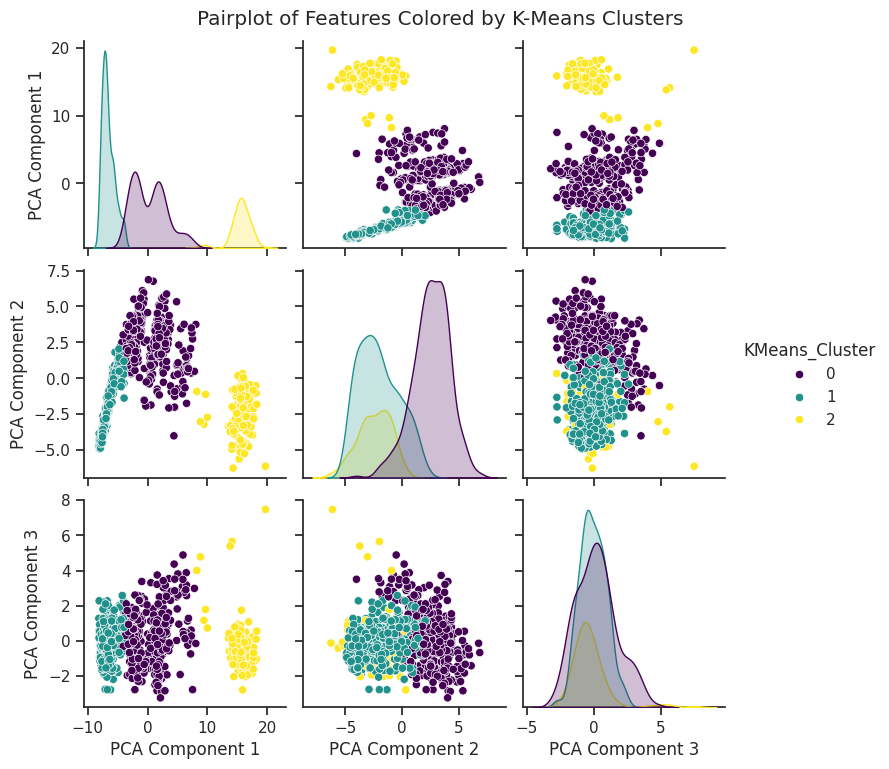

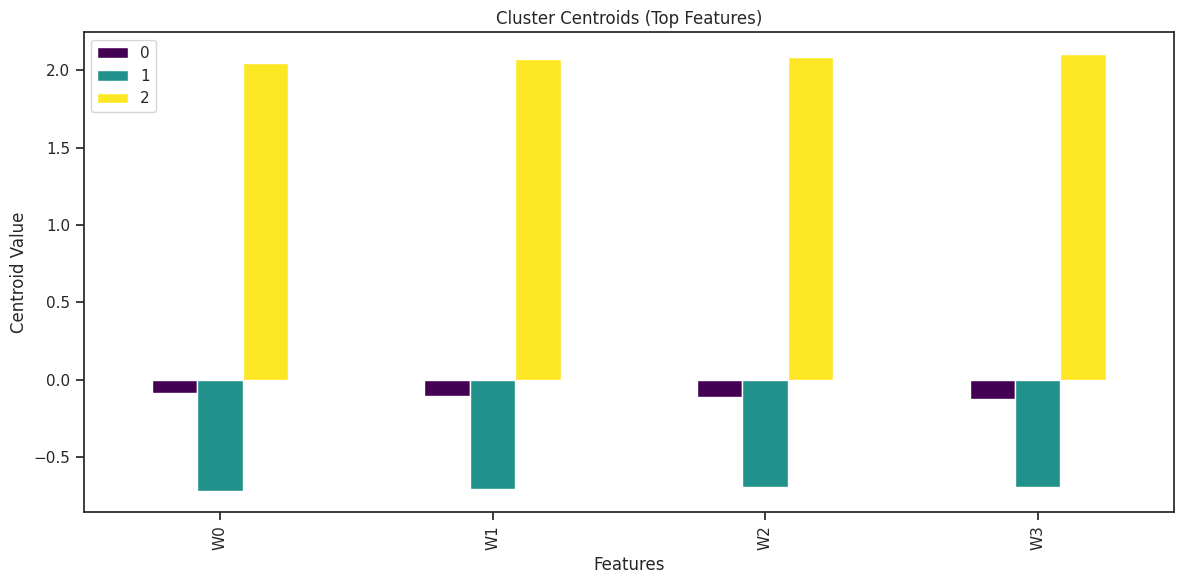

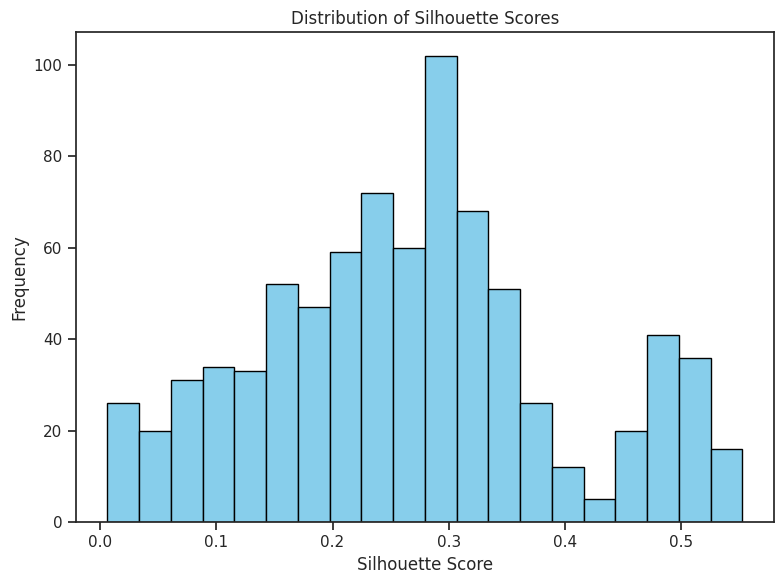

In [ ]:
import zipfile
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Step 1: Unzip the file and load the dataset
zip_file_path = "/content/sales+transactions+dataset+weekly.zip"  # Path to the ZIP file
extract_folder = "/content/sales_transactions_dataset"  # Folder where the contents will be extracted

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load the dataset
file_path = "/content/sales_transactions_dataset/Sales_Transactions_Dataset_Weekly.csv"
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Drop the 'Product_Code' column since it's non-numeric and won't be used in clustering
data_clean = data.drop(columns=['Product_Code'])

# Check for missing values
missing_values = data_clean.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Fill missing values with the column mean (or you can consider other strategies like median or dropping)
data_clean = data_clean.fillna(data_clean.mean())

# Step 3: Scale the data (Important for K-means and DBSCAN)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Step 4: Apply PCA for dimensionality reduction (3D visualization)
pca = PCA(n_components=3)
data_pca_3d = pca.fit_transform(data_scaled)

# Step 5: Apply K-Means clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Add K-Means labels to the dataset
data['KMeans_Cluster'] = kmeans_labels

# Step 6: 3D Visualization of K-Means clusters
df = pd.DataFrame(data_pca_3d, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df['KMeans_Cluster'] = kmeans_labels

# Plotting K-Means clustering in 3D
fig_kmeans = px.scatter_3d(df,
                           x='PCA Component 1',
                           y='PCA Component 2',
                           z='PCA Component 3',
                           color='KMeans_Cluster',  # Changed from 'KMeans Cluster' to 'KMeans_Cluster'
                           title='K-Means Clustering (3D PCA-reduced Data)',
                           labels={'KMeans_Cluster': 'Cluster'}) # Changed from 'KMeans Cluster' to 'KMeans_Cluster'
fig_kmeans.show()

# Step 7: Apply DBSCAN clustering
best_eps = 0.5
dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Add DBSCAN labels to the dataset
data['DBSCAN_Cluster'] = dbscan_labels

# Step 8: Evaluate clusters
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
print(f"Silhouette Score for K-means (k=3): {silhouette_kmeans:.2f}")

if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.2f}")
else:
    print("DBSCAN did not produce more than one cluster. Silhouette Score is not applicable.")

# Step 9: Cluster Summary Table
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data_clean.columns)
cluster_summary = pd.DataFrame(kmeans_labels).value_counts().reset_index()
cluster_summary.columns = ['Cluster', 'Count']
cluster_summary = cluster_summary.merge(centroids, left_on='Cluster', right_index=True, how='left')

print("Cluster Summary Table:")
print(cluster_summary)

# Step 10: Alternative Correlation Heatmap by Cluster
data_with_labels = data_clean.copy()
data_with_labels['Cluster'] = kmeans_labels

# Select only a few features to improve readability
# Choose based on the most relevant features from your dataset
# Example: Selecting the first 4 weekly sales columns
top_features = data_clean.columns[:4]  # Replace with your desired features
data_with_labels_top_features = data_with_labels[top_features.tolist() + ['Cluster']]

# Create a correlation matrix by cluster for top features
corr_matrix = data_with_labels_top_features.groupby('Cluster').mean().corr()

# Plot the heatmap for the top features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap by Cluster (Top Features)')
plt.show()

# Step 11: Visualize Pairplot (using Seaborn)
sns.set(style="ticks")
pairplot = sns.pairplot(df, hue='KMeans_Cluster', palette='viridis', height=2.5)
pairplot.fig.suptitle('Pairplot of Features Colored by K-Means Clusters', y=1.02)  # Title with a little spacing
plt.show()

# Step 12: Alternative Bar Plot of K-Means Cluster Centroids (Top Features)
# Plot only the top features
top_centroids = centroids[top_features]
top_centroids.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Cluster Centroids (Top Features)')
plt.xlabel('Features')
plt.ylabel('Centroid Value')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

# Step 13: Silhouette Score Distribution Plot for K-Means
silhouette_values = silhouette_samples(data_scaled, kmeans_labels)

# Plot silhouette scores for each sample
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Missing values per column:
W0               0
W1               0
W2               0
W3               0
W4               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 106, dtype: int64


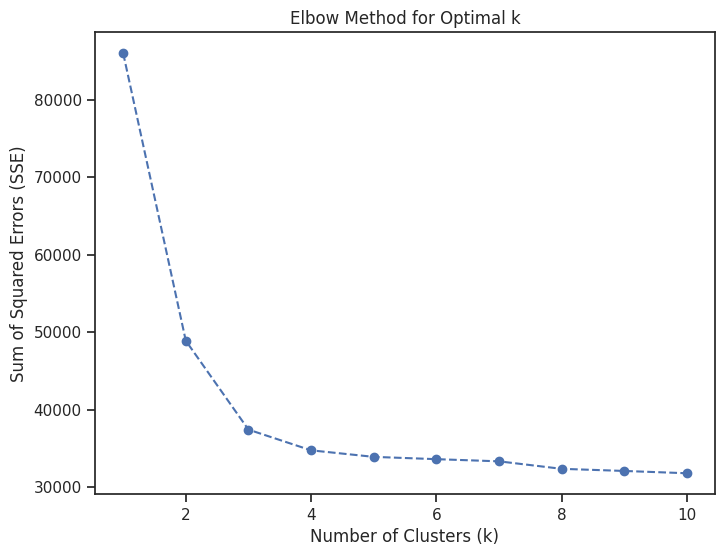

Best Silhouette Score for DBSCAN: -1.00


Silhouette Score for K-Means (k=3): 0.27
DBSCAN did not produce any meaningful clusters with the given parameters.
Number of noise points identified by DBSCAN: 0


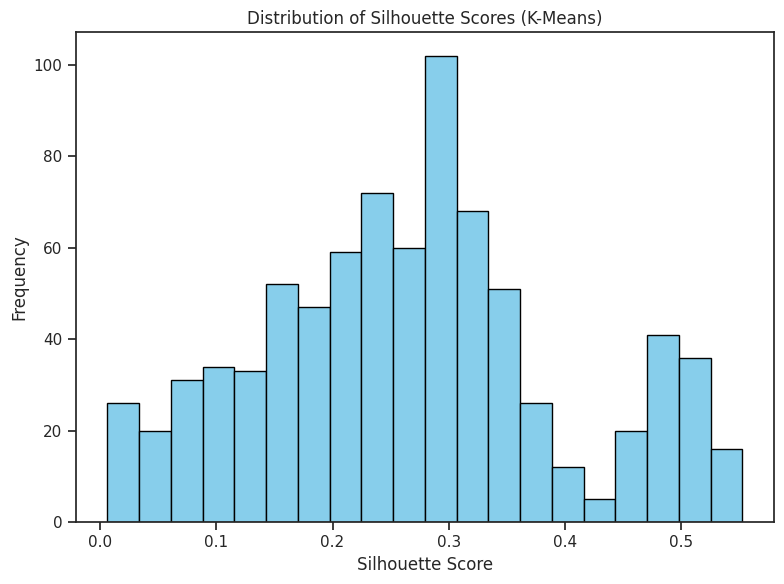

In [8]:
import zipfile
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Step 1: Unzip the file and load the dataset
zip_file_path = "/content/sales+transactions+dataset+weekly.zip"  # Path to the ZIP file
extract_folder = "/content/sales_transactions_dataset"  # Folder where the contents will be extracted

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load the dataset
file_path = "/content/sales_transactions_dataset/Sales_Transactions_Dataset_Weekly.csv"
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Drop the 'Product_Code' column since it's non-numeric and won't be used in clustering
data_clean = data.drop(columns=['Product_Code'])

# Check for missing values
missing_values = data_clean.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Fill missing values with the column mean (or you can consider other strategies like median or dropping)
data_clean = data_clean.fillna(data_clean.mean())

# Step 3: Scale the data (Important for K-means and DBSCAN)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Step 4: Apply PCA for dimensionality reduction (3D visualization)
pca = PCA(n_components=3)
data_pca_3d = pca.fit_transform(data_scaled)

# Function for K-Means Clustering
def perform_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return kmeans, labels

# Step 5: Determine optimal k for K-Means using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans, _ = perform_kmeans(data_scaled, k)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Based on the Elbow Method, set optimal k (adjust based on the plot)
optimal_k = 3
kmeans, kmeans_labels = perform_kmeans(data_scaled, optimal_k)

# Add K-Means labels to the dataset
data['KMeans_Cluster'] = kmeans_labels

# Step 6: 3D Visualization of K-Means clusters
df = pd.DataFrame(data_pca_3d, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df['KMeans_Cluster'] = kmeans_labels

fig_kmeans = px.scatter_3d(df,
                           x='PCA Component 1',
                           y='PCA Component 2',
                           z='PCA Component 3',
                           color='KMeans_Cluster',
                           title='K-Means Clustering (3D PCA-reduced Data)',
                           labels={'KMeans_Cluster': 'Cluster'})
fig_kmeans.show()

# Step 7: Apply DBSCAN clustering with parameter tuning
def perform_dbscan(data, eps_values, min_samples):
    best_model = None
    best_labels = None
    best_silhouette = -1

    for eps in eps_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(data)

        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
            if score > best_silhouette:
                best_model, best_labels, best_silhouette = model, labels, score

    return best_model, best_labels, best_silhouette

# Test different eps values for DBSCAN
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples = 5
best_dbscan, dbscan_labels, dbscan_silhouette = perform_dbscan(data_scaled, eps_values, min_samples)

print(f"Best Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}")

# Add DBSCAN labels to the dataset
data['DBSCAN_Cluster'] = dbscan_labels

# Step 8: 3D Visualization of DBSCAN clusters
df['DBSCAN_Cluster'] = dbscan_labels

fig_dbscan = px.scatter_3d(df,
                           x='PCA Component 1',
                           y='PCA Component 2',
                           z='PCA Component 3',
                           color='DBSCAN_Cluster',
                           title='DBSCAN Clustering (3D PCA-reduced Data)',
                           labels={'DBSCAN_Cluster': 'Cluster'})
fig_dbscan.show()

# Step 9: Cluster Evaluation
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means (k={optimal_k}): {silhouette_kmeans:.2f}")

# Test different eps values for DBSCAN
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples = 5
best_dbscan, dbscan_labels, dbscan_silhouette = perform_dbscan(data_scaled, eps_values, min_samples)

# Check if dbscan_labels is None before proceeding
if dbscan_labels is not None:
    print(f"Best Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}")

    # Add DBSCAN labels to the dataset
    data['DBSCAN_Cluster'] = dbscan_labels

    # ... (rest of the code for DBSCAN visualization and evaluation)
else:
    print("DBSCAN did not produce any meaningful clusters with the given parameters.")
# Step 10: Analyze noise in DBSCAN
noise_points = np.sum(np.array(dbscan_labels) == -1)
print(f"Number of noise points identified by DBSCAN: {noise_points}")

# Step 11: Visualize Silhouette Score Distribution for K-Means
silhouette_values = silhouette_samples(data_scaled, kmeans_labels)

plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Silhouette Scores (K-Means)')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
